In [8]:
%run ./Dissertation.ipynb

This notebook presents the fitting of my model to behavioural data. I then explore the training of both the SCZ and HC cohort. Some of the plots here are used in the paper, some are just for my own visualisation

In [3]:
a_distances = [24, 39, 54, 75, 96, 111, 126]

### HC Model (Pre Training)

In [9]:
HCLt, HCLa, HCLv = Lw(.15, .05, 1, 4, .15, .05, 20, 80, .15, .05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(.9, 2, .9, 2, .9, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(6.5, 6.5, 6.5, 7.75, 7.75, 7.75, 17, 990, 49, 0.98) #feedforward and feedback

HCzt, HCza, HCzm, HCzv, HCrt = experiment(0.4, 200, a_distances, 5, HCLt, HCLa, HCLv, HCWt, HCWa, HCWv, HCBt, HCBa, HCBv, HCWat, HCWvt, HCWav, 0, 0)

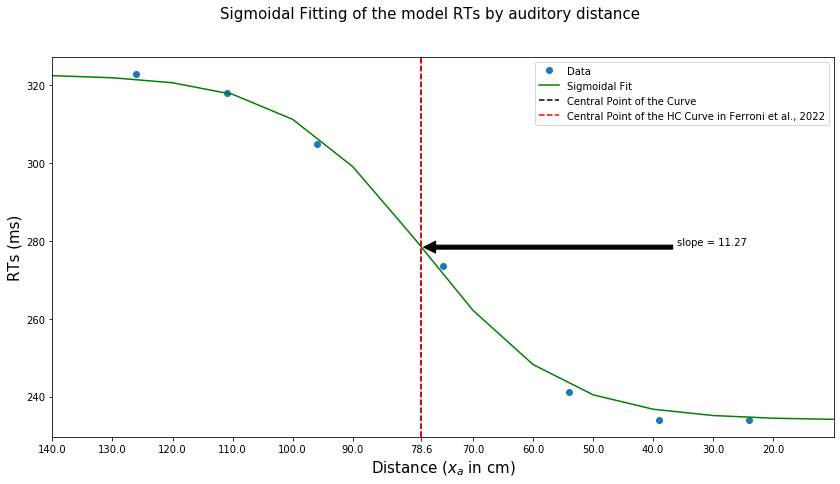

In [10]:
ymin = np.min(HCrt)
ymax = np.max(HCrt)

HCcp, HCslope = fitting(a_distances, HCrt)   

x = np.arange(10, 150, 10)
y = RTsig(x, HCcp, HCslope)
plt.figure(figsize = (14,7))

plt.plot(a_distances, HCrt, 'o', label='Data')
plt.plot(x,y, label='Sigmoidal Fit', color = "g")
plt.axvline(x = HCcp, color = 'black', label = 'Central Point of the Curve', linestyle = "dashed")
plt.axvline(x = fprHCCP, color = 'red', label = 'Central Point of the HC Curve in Ferroni et al., 2022', linestyle = "dashed")

plt.xlim(max(x), min(x))
plt.xticks([20,30,40,50,60,70,HCcp,90, 100,110,120,130,140])

plt.suptitle("Sigmoidal Fitting of the model RTs by auditory distance", fontsize = 15)
plt.legend(loc='best')
plt.xlabel("Distance ($x_a$ in cm)", fontsize = 15)
plt.ylabel("RTs (ms)", fontsize = 15)

plt.annotate('slope = {}'.format(round(HCslope, 3)),
            xy=(HCcp, (ymax+ymin)/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

plt.show()

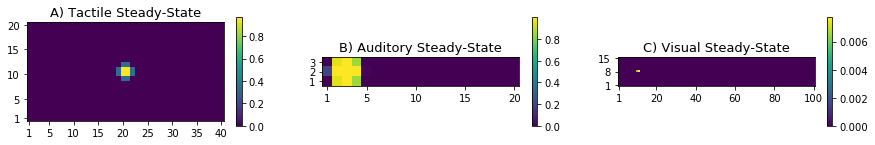

In [11]:
#Steady State
x = 0

fig, ax = plt.subplots(1, 3, figsize = (15, 4))

hm = ax[0].imshow(HCzt[:,:,x,-1].T)
ax[0].set_ylim(-0.5, 19.5)
ax[0].set_xlim(-0.5, 39.5)
ax[0].set_xticks([0, 4, 9, 14, 19, 24, 29, 34, 39])
ax[0].set_xticklabels(['1','5','10', '15', '20', '25', '30', '35', '40'])
ax[0].set_yticks([0, 4, 9, 14, 19])
ax[0].set_yticklabels(['1','5','10', '15', '20'])
ax[0].set_title('A) Tactile Steady-State', fontsize = 13)
fig.colorbar(hm, ax = ax[0], shrink = 0.5)

hm2 = ax[1].imshow(HCza[:,:,x,-1].T)
ax[1].set_ylim(-0.5, 2.5)
ax[1].set_xlim(-0.5, 19.5)
ax[1].set_xticks([0, 4, 9, 14, 19])
ax[1].set_xticklabels(['1','5','10', '15', '20'])
ax[1].set_yticks([0, 1, 2])
ax[1].set_yticklabels(['1','2','3'])
ax[1].set_title('B) Auditory Steady-State', fontsize = 13)
fig.colorbar(hm2, ax = ax[1], shrink = 0.5)


hm3 = ax[2].imshow(HCzv[:, :, x, -1].T)
ax[2].set_ylim(-0.5, 14.5)
ax[2].set_xlim(-0.5, 99.5)
ax[2].set_xticks([0, 19, 39, 59, 79, 99])
ax[2].set_xticklabels(['1','20','40', '60', '80', '100'])
ax[2].set_yticks([0, 7, 14])
ax[2].set_yticklabels(['1','8', '15'])
ax[2].set_title('C) Visual Steady-State', fontsize = 13)
fig.colorbar(hm3, ax = ax[2], shrink = 0.5)

plt.show()


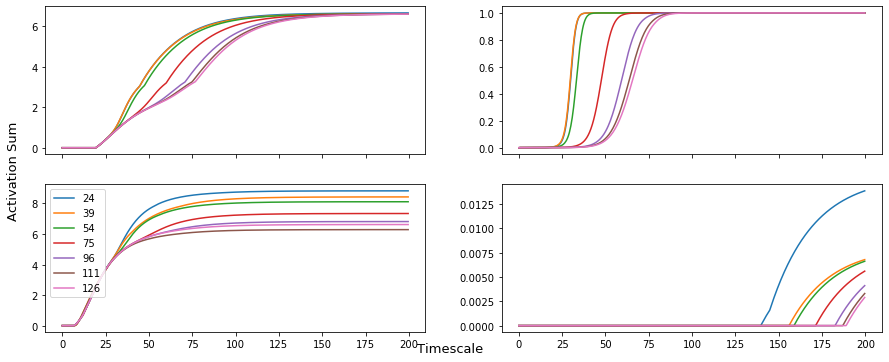

In [12]:
x = 500

tact = np.zeros((7, x))
aud = np.zeros((7, x))
vis = np.zeros((7, x))


for j in range(7):
    for i in range(x):
        tact[j,i] = np.sum(HCzt[:,:,j, i])
        aud[j, i] = np.sum(HCza[:,:,j, i])
        vis[j, i] = np.sum(HCzv[:,:,j, i])

#2.10 network evolution
fig, ax = plt.subplots(2, 2, figsize = (15, 6), sharex="col")

time = np.arange(0, 400 + 0.4, 0.4)

for i in range(len(a_distances)):
    ax[0,0].plot(time[:x], tact[i, :x], label = a_distances[i])  
    ax[1,0].plot(time[:x], aud[i, :x], label = a_distances[i]) 
    ax[1,0].legend() 
    ax[0,1].plot(time[:x], HCzm[i, :x], label = a_distances[i])  
    ax[1,1].plot(time[:x], vis[i, :x], label = a_distances[i])  

fig.text(0.5, 0.08, 'Timescale', ha='center', fontsize = 13)
fig.text(0.09, 0.5, 'Activation Sum', va='center', rotation='vertical', fontsize = 13)


plt.show()

### HC Model (Post Training)

If you want to check the training output for yourself (takes about 15mins to run)

In [13]:
HCWa_tr, HCWv_tr, HCtzm, HCtzv, HCtza, HCtzt = FWTraining(100, 200, 0.4, HCLt, HCLa, HCLv, HCWt, HCWa, HCWv, HCBt, HCBa, HCBv, HCWat, HCWvt, HCWav, 0, 0.000385, 6.5, 6.5, 0.00005, 0.00005, 0.05)

In [14]:
#np.save("HCWa_tr", HCWa_tr)
#np.save("HCWv_tr", HCWv_tr)
#np.save("HCtzm", HCtzm)
#np.save("HCtzv", HCtzv)
#np.save("HCtza", HCtza)
#np.save("HCtzt", HCtzt)

If you simply want to load the weights

In [15]:
#HCWa_tr = np.load(HCWa_tr)
#HCWv_tr = np.load(HCWv_tr)
#HCtzm = np.load(HCtzm)
#HCtzv = np.load(HCtzv)
#HCtza = np.load(HCtza)
#HCtzv = np.load(HCtzt)

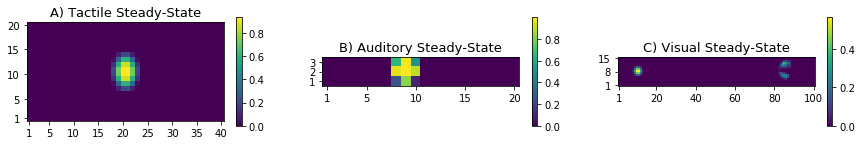

In [16]:
#Steady State
x = -3


fig, ax = plt.subplots(1, 3, figsize = (15, 4))

hm = ax[0].imshow(HCtzt[:,:,x,-1].T)
ax[0].set_ylim(-0.5, 19.5)
ax[0].set_xlim(-0.5, 39.5)
ax[0].set_xticks([0, 4, 9, 14, 19, 24, 29, 34, 39])
ax[0].set_xticklabels(['1','5','10', '15', '20', '25', '30', '35', '40'])
ax[0].set_yticks([0, 4, 9, 14, 19])
ax[0].set_yticklabels(['1','5','10', '15', '20'])
ax[0].set_title('A) Tactile Steady-State', fontsize = 13)
fig.colorbar(hm, ax = ax[0], shrink = 0.5)

hm2 = ax[1].imshow(HCtza[:,:,x,-1].T)
ax[1].set_ylim(-0.5, 2.5)
ax[1].set_xlim(-0.5, 19.5)
ax[1].set_xticks([0, 4, 9, 14, 19])
ax[1].set_xticklabels(['1','5','10', '15', '20'])
ax[1].set_yticks([0, 1, 2])
ax[1].set_yticklabels(['1','2','3'])
ax[1].set_title('B) Auditory Steady-State', fontsize = 13)
fig.colorbar(hm2, ax = ax[1], shrink = 0.5)


hm3 = ax[2].imshow(HCtzv[:, :, x, -1].T)
ax[2].set_ylim(-0.5, 14.5)
ax[2].set_xlim(-0.5, 99.5)
ax[2].set_xticks([0, 19, 39, 59, 79, 99])
ax[2].set_xticklabels(['1','20','40', '60', '80', '100'])
ax[2].set_yticks([0, 7, 14])
ax[2].set_yticklabels(['1','8', '15'])
ax[2].set_title('C) Visual Steady-State', fontsize = 13)
fig.colorbar(hm3, ax = ax[2], shrink = 0.5)

plt.show()

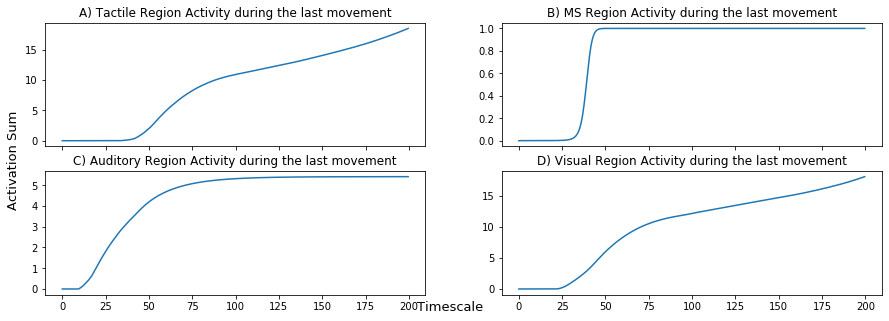

In [17]:
x = 500
tact = np.zeros(x)
aud = np.zeros(x)
vis = np.zeros(x)
time = np.arange(0, 200 + 0.4, 0.4)

for i in range(x):
    tact[i] = np.sum(HCtzt[:,:,-1, i])
    aud[i] = np.sum(HCtza[:,:,-1, i])
    vis[i] = np.sum(HCtzv[:,:,-1, i])

fig, ax = plt.subplots(2, 2, figsize = (15, 5), sharex="col")

ax[0,0].plot(time[:x], tact[:x])  
ax[1,0].plot(time[:x], aud[:x]) 
ax[0,1].plot(time[:x], HCtzm[-1, :x])  
ax[1,1].plot(time[:x], vis[:x])  

fig.text(0.5, 0.08, 'Timescale', ha='center', fontsize = 13)
fig.text(0.09, 0.5, 'Activation Sum', va='center', rotation='vertical', fontsize = 13)
ax[0,0].set_title("A) Tactile Region Activity during the last movement")
ax[0,1].set_title("B) MS Region Activity during the last movement")
ax[1,0].set_title("C) Auditory Region Activity during the last movement")
ax[1,1].set_title("D) Visual Region Activity during the last movement")
plt.show()

#### Testing out the new weights

In [61]:
HCztpost, HCzapost, HCzmpost, HCzvpost, HCrtpost = experiment(0.4, 200, a_distances, 5, HCLt, HCLa, HCLv, HCWt, HCWa_tr[:,:,-1,-1], HCWv_tr[:,:,-1,-1], HCBt, HCBa, HCBv, HCWat, HCWvt, HCWav, 0, 0)

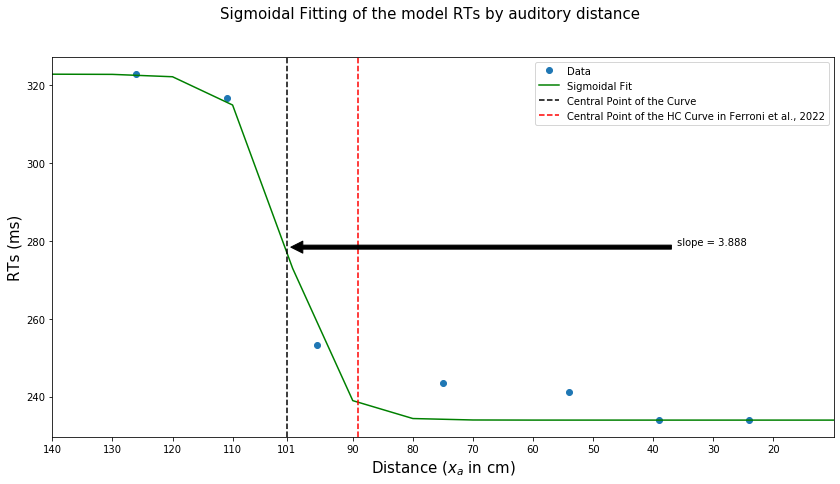

In [64]:
ymin = np.min(HCrtpost)
ymax = np.max(HCrtpost)

HCcppost, HCslopepost = fitting(a_distances, HCrtpost)   

x = np.arange(10, 150, 10)
y = RTsig(x, HCcppost, HCslopepost)
plt.figure(figsize = (14,7))

plt.plot(a_distances, HCrtpost, 'o', label='Data')
plt.plot(x,y, label='Sigmoidal Fit', color = "g")
plt.axvline(x = HCcppost, color = 'black', label = 'Central Point of the Curve', linestyle = "dashed")
plt.axvline(x = fpostHCCP, color = 'red', label = 'Central Point of the HC Curve in Ferroni et al., 2022', linestyle = "dashed")

plt.xlim(max(x), min(x))
plt.xticks([20,30,40,50,60,70,80, 90, HCcppost,110,120,130,140])

plt.suptitle("Sigmoidal Fitting of the model RTs by auditory distance", fontsize = 15)
plt.legend(loc='best')
plt.xlabel("Distance ($x_a$ in cm)", fontsize = 15)
plt.ylabel("RTs (ms)", fontsize = 15)

plt.annotate('slope = {}'.format(round(HCslopepost, 3)),
            xy=(HCcppost, (ymax+ymin)/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

plt.show()

Testing the post-training weights after 5 movements

In [28]:
HCztpost5, HCzapost5, HCzmpost5, HCzvpost5, HCrtpost5 = experiment(0.4, 200, a_distances, 5, HCLt, HCLa, HCLv, HCWt, HCWa_tr[:,:,5,-1], HCWv_tr[:,:,5,-1], HCBt, HCBa, HCBv, HCWat, HCWvt, HCWav, 0, 0)

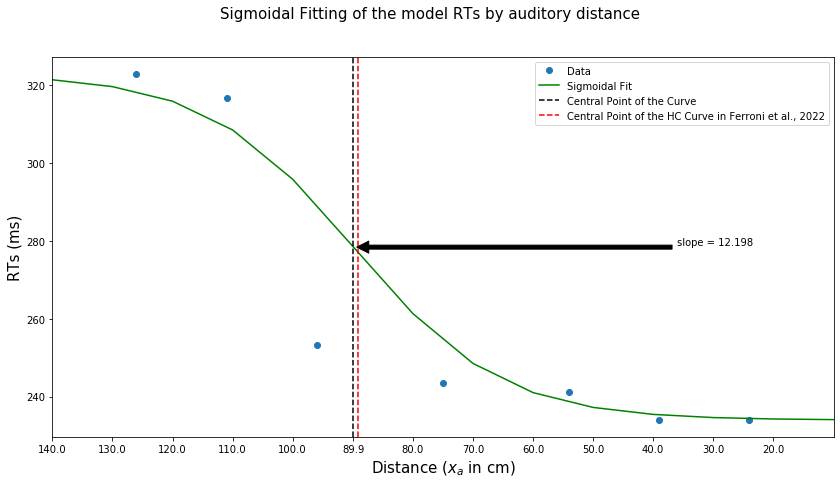

In [29]:
ymin = np.min(HCrtpost5)
ymax = np.max(HCrtpost5)

HCcppost, HCslopepost = fitting(a_distances, HCrtpost5)   

x = np.arange(10, 150, 10)
y = RTsig(x, HCcppost, HCslopepost)
plt.figure(figsize = (14,7))

plt.plot(a_distances, HCrtpost, 'o', label='Data')
plt.plot(x,y, label='Sigmoidal Fit', color = "g")
plt.axvline(x = HCcppost, color = 'black', label = 'Central Point of the Curve', linestyle = "dashed")
plt.axvline(x = fpostHCCP, color = 'red', label = 'Central Point of the HC Curve in Ferroni et al., 2022', linestyle = "dashed")

plt.xlim(max(x), min(x))
plt.xticks([20,30,40,50,60,70,80, HCcppost,100, 110,120,130,140])

plt.suptitle("Sigmoidal Fitting of the model RTs by auditory distance", fontsize = 15)
plt.legend(loc='best')
plt.xlabel("Distance ($x_a$ in cm)", fontsize = 15)
plt.ylabel("RTs (ms)", fontsize = 15)

plt.annotate('slope = {}'.format(round(HCslopepost, 3)),
            xy=(HCcppost, (ymax+ymin)/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

plt.show()

### SCZ Model (Pre Training)

In [30]:
SCZLt, SCZLa, SCZLv = Lw(1.25, .05, 1, 4, 1.25, .05, 20, 80, 1.25, .05, 2, 8)
SCZWat, SCZWvt, SCZWav = crossmodal(.9, 2, .9, 2, .9, 2)
SCZWt, SCZWa, SCZWv, SCZBt, SCZBa, SCZBv = FwFb(6.5, 6.5, 6.5, 2.5, 2.5, 2.5, 17, 990, 49, 0.98) 

SCZzt, SCZza, SCZzm, SCZzv, SCZrt = experiment(0.4, 200, a_distances, 5, SCZLt, SCZLa, SCZLv, SCZWt, SCZWa, SCZWv, SCZBt, SCZBa, SCZBv, SCZWat, SCZWvt, SCZWav, 1.75, 0)

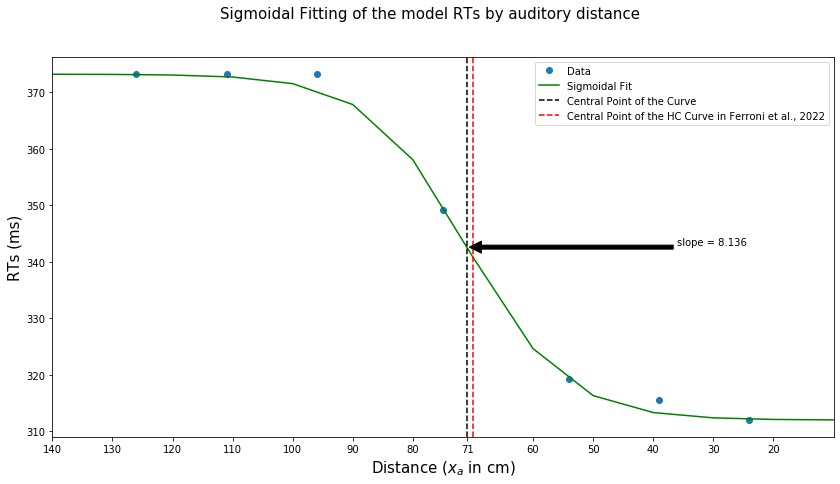

In [31]:
ymin = np.min(SCZrt)
ymax = np.max(SCZrt)

SCZcp, SCZslope = fitting(a_distances, SCZrt)   

x = np.arange(10, 150, 10)
y = RTsig(x, SCZcp, SCZslope)
plt.figure(figsize = (14,7))

plt.plot(a_distances, SCZrt, 'o', label='Data')
plt.plot(x,y, label='Sigmoidal Fit', color = "g")
plt.axvline(x = SCZcp, color = 'black', label = 'Central Point of the Curve', linestyle = "dashed")
plt.axvline(x = fprSCZCP, color = 'red', label = 'Central Point of the HC Curve in Ferroni et al., 2022', linestyle = "dashed")

plt.xlim(max(x), min(x))
plt.xticks([20,30,40,50,60,SCZcp,80,90,100,110,120,130,140])

plt.suptitle("Sigmoidal Fitting of the model RTs by auditory distance", fontsize = 15)
plt.legend(loc='best')
plt.xlabel("Distance ($x_a$ in cm)", fontsize = 15)
plt.ylabel("RTs (ms)", fontsize = 15)

plt.annotate('slope = {}'.format(round(SCZslope, 3)),
            xy=(SCZcp, (ymax+ymin)/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

plt.show()

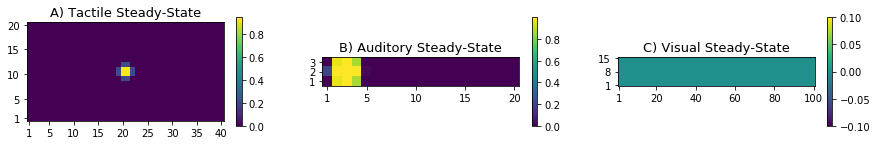

In [32]:
#Steady State
x = 0

fig, ax = plt.subplots(1, 3, figsize = (15, 4))

hm = ax[0].imshow(SCZzt[:,:,x,-1].T)
ax[0].set_ylim(-0.5, 19.5)
ax[0].set_xlim(-0.5, 39.5)
ax[0].set_xticks([0, 4, 9, 14, 19, 24, 29, 34, 39])
ax[0].set_xticklabels(['1','5','10', '15', '20', '25', '30', '35', '40'])
ax[0].set_yticks([0, 4, 9, 14, 19])
ax[0].set_yticklabels(['1','5','10', '15', '20'])
ax[0].set_title('A) Tactile Steady-State', fontsize = 13)
fig.colorbar(hm, ax = ax[0], shrink = 0.5)

hm2 = ax[1].imshow(SCZza[:,:,x,-1].T)
ax[1].set_ylim(-0.5, 2.5)
ax[1].set_xlim(-0.5, 19.5)
ax[1].set_xticks([0, 4, 9, 14, 19])
ax[1].set_xticklabels(['1','5','10', '15', '20'])
ax[1].set_yticks([0, 1, 2])
ax[1].set_yticklabels(['1','2','3'])
ax[1].set_title('B) Auditory Steady-State', fontsize = 13)
fig.colorbar(hm2, ax = ax[1], shrink = 0.5)


hm3 = ax[2].imshow(SCZzv[:, :, x, -1].T)
ax[2].set_ylim(-0.5, 14.5)
ax[2].set_xlim(-0.5, 99.5)
ax[2].set_xticks([0, 19, 39, 59, 79, 99])
ax[2].set_xticklabels(['1','20','40', '60', '80', '100'])
ax[2].set_yticks([0, 7, 14])
ax[2].set_yticklabels(['1','8', '15'])
ax[2].set_title('C) Visual Steady-State', fontsize = 13)
fig.colorbar(hm3, ax = ax[2], shrink = 0.5)

plt.show()

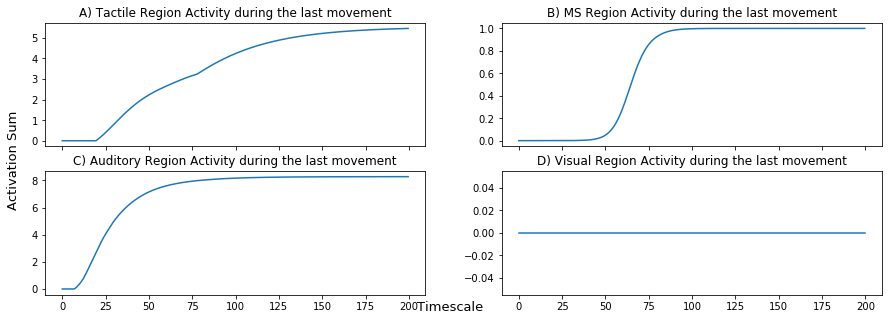

In [33]:
x = 500
tact = np.zeros(x)
aud = np.zeros(x)
vis = np.zeros(x)
time = np.arange(0, 200 + 0.4, 0.4)

for i in range(x):
    tact[i] = np.sum(SCZzt[:,:,-1, i])
    aud[i] = np.sum(SCZza[:,:,-1, i])
    vis[i] = np.sum(SCZzv[:,:,-1, i])

#2.10 network evolution
fig, ax = plt.subplots(2, 2, figsize = (15, 5), sharex="col")

ax[0,0].plot(time[:x], tact[:x])  
ax[1,0].plot(time[:x], aud[:x]) 
ax[0,1].plot(time[:x], SCZzm[-1, :x])  
ax[1,1].plot(time[:x], vis[:x])  

fig.text(0.5, 0.08, 'Timescale', ha='center', fontsize = 13)
fig.text(0.09, 0.5, 'Activation Sum', va='center', rotation='vertical', fontsize = 13)
ax[0,0].set_title("A) Tactile Region Activity during the last movement")
ax[0,1].set_title("B) MS Region Activity during the last movement")
ax[1,0].set_title("C) Auditory Region Activity during the last movement")
ax[1,1].set_title("D) Visual Region Activity during the last movement")
plt.show()

### SCZ Model (Post Training)

#### If you want to check for yourself the training outputs

In [34]:
SCZWa_tr, SCZWv_tr, SCZtzm, SCZtzv, SCZtza, SCZtzt = FWTraining(100, 200, 0.4, SCZLt, SCZLa, SCZLv, SCZWt, SCZWa, SCZWv, SCZBt, SCZBa, SCZBv, SCZWat, SCZWvt, SCZWav, 1.75, 0.000385, 6.5, 6.5, 0.00005, 0.00005, 0.05)

In [35]:
#np.save("SCZWa_tr", SCZWa_tr)
#np.save("SCZWv_tr", SCZWv_tr)
#np.save("SCZtzm", SCZtzm)
#np.save("SCZtzv", SCZtzv)
#np.save("SCZtza", SCZtza)
#np.save("SCZtzt", SCZtzt)

#### If you want to simply pre-load the numpy objects

In [36]:
#SCZWa_tr = np.load(SCZWa_tr)
#SCZWv_tr = np.load(SCZWv_tr)
#SCZtzm = np.load(SCZtzm)
#SCZtzv = np.load(SCZtzv)
#SCZtza = np.load(SCZtza)
#SCZtzv = np.load(SCZtzt)

#### Some Plots

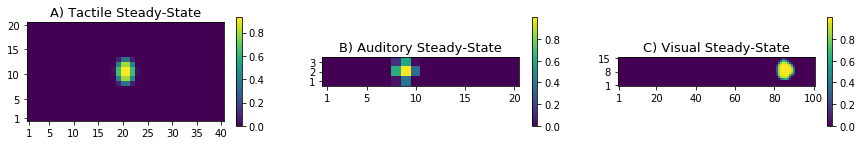

In [37]:
#Steady State
x = -6

fig, ax = plt.subplots(1, 3, figsize = (15, 4))

hm = ax[0].imshow(SCZtzt[:,:,x,-1].T)
ax[0].set_ylim(-0.5, 19.5)
ax[0].set_xlim(-0.5, 39.5)
ax[0].set_xticks([0, 4, 9, 14, 19, 24, 29, 34, 39])
ax[0].set_xticklabels(['1','5','10', '15', '20', '25', '30', '35', '40'])
ax[0].set_yticks([0, 4, 9, 14, 19])
ax[0].set_yticklabels(['1','5','10', '15', '20'])
ax[0].set_title('A) Tactile Steady-State', fontsize = 13)
fig.colorbar(hm, ax = ax[0], shrink = 0.5)

hm2 = ax[1].imshow(SCZtza[:,:,x,-1].T)
ax[1].set_ylim(-0.5, 2.5)
ax[1].set_xlim(-0.5, 19.5)
ax[1].set_xticks([0, 4, 9, 14, 19])
ax[1].set_xticklabels(['1','5','10', '15', '20'])
ax[1].set_yticks([0, 1, 2])
ax[1].set_yticklabels(['1','2','3'])
ax[1].set_title('B) Auditory Steady-State', fontsize = 13)
fig.colorbar(hm2, ax = ax[1], shrink = 0.5)


hm3 = ax[2].imshow(SCZtzv[:, :,x, -1].T)
ax[2].set_ylim(-0.5, 14.5)
ax[2].set_xlim(-0.5, 99.5)
ax[2].set_xticks([0, 19, 39, 59, 79, 99])
ax[2].set_xticklabels(['1','20','40', '60', '80', '100'])
ax[2].set_yticks([0, 7, 14])
ax[2].set_yticklabels(['1','8', '15'])
ax[2].set_title('C) Visual Steady-State', fontsize = 13)
fig.colorbar(hm3, ax = ax[2], shrink = 0.5)

plt.show()


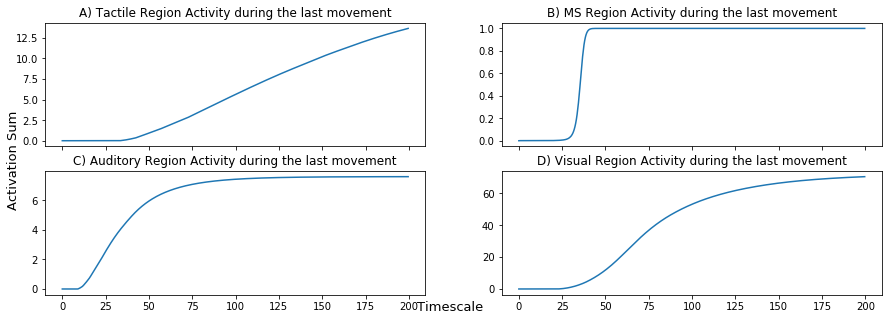

In [38]:
x = 500
tact = np.zeros(x)
aud = np.zeros(x)
vis = np.zeros(x)
time = np.arange(0, 200 + 0.4, 0.4)

for i in range(x):
    tact[i] = np.sum(SCZtzt[:,:,-1, i])
    aud[i] = np.sum(SCZtza[:,:,-1, i])
    vis[i] = np.sum(SCZtzv[:,:,-1, i])

#2.10 network evolution
fig, ax = plt.subplots(2, 2, figsize = (15, 5), sharex="col")

ax[0,0].plot(time[:x], tact[:x])  
ax[1,0].plot(time[:x], aud[:x]) 
ax[0,1].plot(time[:x], SCZtzm[-1, :x])  
ax[1,1].plot(time[:x], vis[:x])  

fig.text(0.5, 0.08, 'Timescale', ha='center', fontsize = 13)
fig.text(0.09, 0.5, 'Activation Sum', va='center', rotation='vertical', fontsize = 13)
ax[0,0].set_title("A) Tactile Region Activity during the last movement")
ax[0,1].set_title("B) MS Region Activity during the last movement")
ax[1,0].set_title("C) Auditory Region Activity during the last movement")
ax[1,1].set_title("D) Visual Region Activity during the last movement")
plt.show()

Text(0.5, 1.0, 'C) Visual Steady-State')

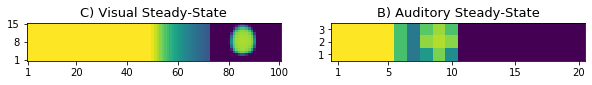

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

hm2 = ax[1].imshow(SCZWa_tr[:,:,-1,-1].T)
ax[1].set_ylim(-0.5, 2.5)
ax[1].set_xlim(-0.5, 19.5)
ax[1].set_xticks([0, 4, 9, 14, 19])
ax[1].set_xticklabels(['1','5','10', '15', '20'])
ax[1].set_yticks([0, 1, 2])
ax[1].set_yticklabels(['1','2','3'])
ax[1].set_title('B) Auditory Steady-State', fontsize = 13)


hm3 = ax[0].imshow(SCZWv_tr[:, :, -1, -1].T)
ax[0].set_ylim(-0.5, 14.5)
ax[0].set_xlim(-0.5, 99.5)
ax[0].set_xticks([0, 19, 39, 59, 79, 99])
ax[0].set_xticklabels(['1','20','40', '60', '80', '100'])
ax[0].set_yticks([0, 7, 14])
ax[0].set_yticklabels(['1','8', '15'])
ax[0].set_title('C) Visual Steady-State', fontsize = 13)


#### Testing out the weights

In [60]:
SCZztpost, SCZzapost, SCZzmpost, SCZzvpost, SCZrtpost = experiment(0.4, 200, a_distances, 5, SCZLt, SCZLa, SCZLv, SCZWt, SCZWa_tr[:,:,-1,-1], SCZWv_tr[:,:,-1,-1], SCZBt, SCZBa, SCZBv, SCZWat, SCZWvt, SCZWav, 0, 0)

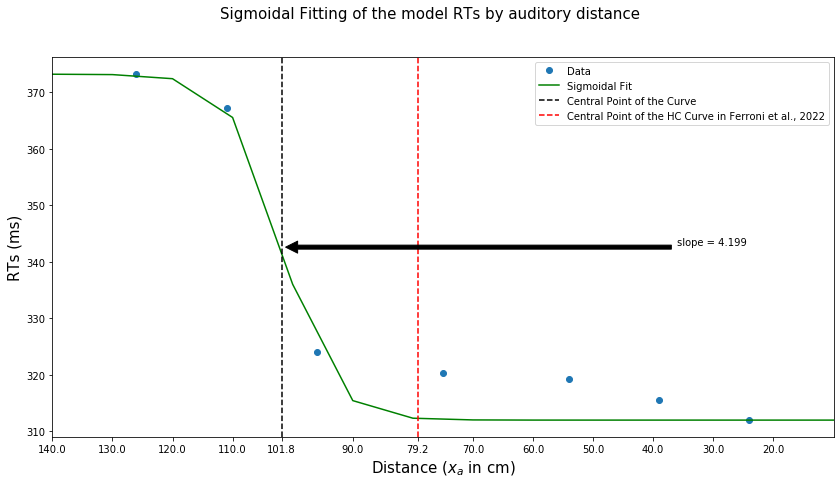

In [66]:
ymin = np.min(SCZrtpost)
ymax = np.max(SCZrtpost)

SCZcppost, SCZslopepost = fitting(a_distances, SCZrtpost)   

x = np.arange(10, 150, 10)
y = RTsig(x, SCZcppost, SCZslopepost)
plt.figure(figsize = (14,7))

plt.plot(a_distances, SCZrtpost, 'o', label='Data')
plt.plot(x,y, label='Sigmoidal Fit', color = "g")
plt.axvline(x = SCZcppost, color = 'black', label = 'Central Point of the Curve', linestyle = "dashed")
plt.axvline(x = fpostSCZCP, color = 'red', label = 'Central Point of the HC Curve in Ferroni et al., 2022', linestyle = "dashed")

plt.xlim(max(x), min(x))
plt.xticks([20,30,40,50,60,70, fpostSCZCP, SCZcppost,90,110,120,130,140])

plt.suptitle("Sigmoidal Fitting of the model RTs by auditory distance", fontsize = 15)
plt.legend(loc='best')
plt.xlabel("Distance ($x_a$ in cm)", fontsize = 15)
plt.ylabel("RTs (ms)", fontsize = 15)

plt.annotate('slope = {}'.format(round(SCZslopepost, 3)),
            xy=(SCZcppost, (ymax+ymin)/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

plt.show()

Testing experimental results after 5 movements. Due to noise, plot reproduction may slightly differ.

In [49]:
SCZztpost5, SCZzapost5, SCZzmpost5, SCZzvpost5, SCZrtpost5 = experiment(0.4, 200, a_distances, 5, SCZLt, SCZLa, SCZLv, SCZWt, SCZWa_tr[:,:,5,-1], SCZWv_tr[:,:,5,-1], SCZBt, SCZBa, SCZBv, SCZWat, SCZWvt, SCZWav, 0, 0)

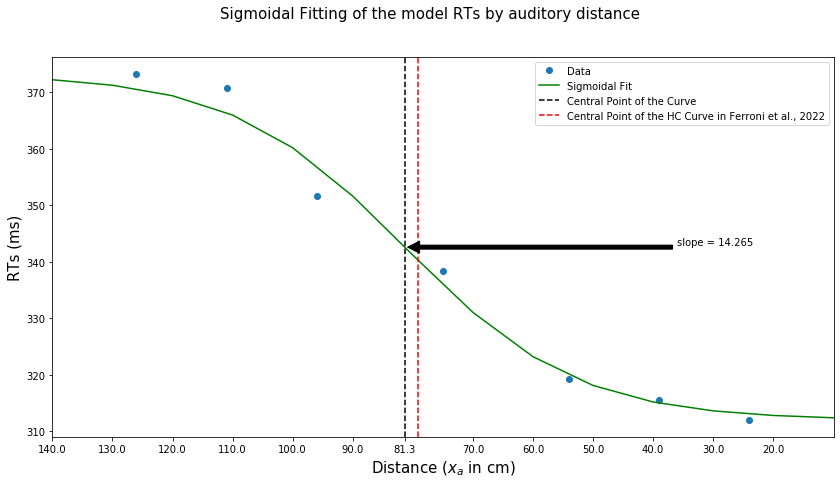

In [50]:
ymin = np.min(SCZrtpost5)
ymax = np.max(SCZrtpost5)

SCZcppost, SCZslopepost = fitting(a_distances, SCZrtpost5)   

x = np.arange(10, 150, 10)
y = RTsig(x, SCZcppost, SCZslopepost)
plt.figure(figsize = (14,7))

plt.plot(a_distances, SCZrtpost5, 'o', label='Data')
plt.plot(x,y, label='Sigmoidal Fit', color = "g")
plt.axvline(x = SCZcppost, color = 'black', label = 'Central Point of the Curve', linestyle = "dashed")
plt.axvline(x = fpostSCZCP, color = 'red', label = 'Central Point of the HC Curve in Ferroni et al., 2022', linestyle = "dashed")

plt.xlim(max(x), min(x))
plt.xticks([20,30,40,50,60,70,SCZcppost,90, 100,110,120,130,140])

plt.suptitle("Sigmoidal Fitting of the model RTs by auditory distance", fontsize = 15)
plt.legend(loc='best')
plt.xlabel("Distance ($x_a$ in cm)", fontsize = 15)
plt.ylabel("RTs (ms)", fontsize = 15)

plt.annotate('slope = {}'.format(round(SCZslopepost, 3)),
            xy=(SCZcppost, (ymax+ymin)/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

plt.show()

Putting the two 5-movement trainings together

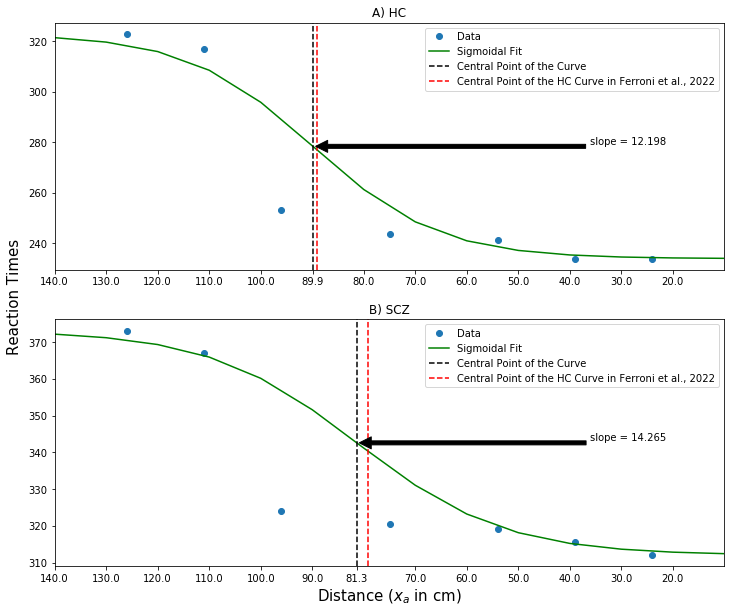

In [51]:
fig, ax = plt.subplots(2, 1, figsize = (12, 10))
ymin = np.min(HCrtpost)
ymax = np.max(HCrtpost)

HCcppost, HCslopepost = fitting(a_distances, HCrtpost5)   

x = np.arange(10, 150, 10)
y = RTsig(x, HCcppost, HCslopepost)

ax[0].plot(a_distances, HCrtpost, 'o', label='Data')
ax[0].plot(x,y, label='Sigmoidal Fit', color = "g")
ax[0].axvline(x = HCcppost, color = 'black', label = 'Central Point of the Curve', linestyle = "dashed")
ax[0].axvline(x = fpostHCCP, color = 'red', label = 'Central Point of the HC Curve in Ferroni et al., 2022', linestyle = "dashed")
ax[0].set_xlim(max(x), min(x))
ax[0].set_xticks([20,30,40,50,60,70,80, HCcppost,100, 110,120,130,140])
ax[0].set_title("A) HC")
ax[0].legend(loc='best')
ax[0].annotate('slope = {}'.format(round(HCslopepost, 3)),
            xy=(HCcppost, (ymax+ymin)/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

ymin = np.min(SCZrtpost)
ymax = np.max(SCZrtpost)

SCZcppost, SCZslopepost = fitting(a_distances, SCZrtpost5)   

x = np.arange(10, 150, 10)
y = RTsig(x, SCZcppost, SCZslopepost)
ax[1].plot(a_distances, SCZrtpost, 'o', label='Data')
ax[1].plot(x,y, label='Sigmoidal Fit', color = "g")
ax[1].axvline(x = SCZcppost, color = 'black', label = 'Central Point of the Curve', linestyle = "dashed")
ax[1].axvline(x = fpostSCZCP, color = 'red', label = 'Central Point of the HC Curve in Ferroni et al., 2022', linestyle = "dashed")
ax[1].set_xlim(max(x), min(x))
ax[1].set_xticks([20,30,40,50,60,70,SCZcppost,90, 100,110,120,130,140])
ax[1].set_title("B) SCZ")
ax[1].legend(loc='best')
ax[1].set_xlabel("Distance ($x_a$ in cm)", fontsize = 15)
ax[1].annotate('slope = {}'.format(round(SCZslopepost, 3)),
            xy=(SCZcppost, (ymax+ymin)/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

fig.text(0.07, 0.5, 'Reaction Times', va='center', rotation='vertical', fontsize = 15)
plt.show()

Exploring SK-fitting

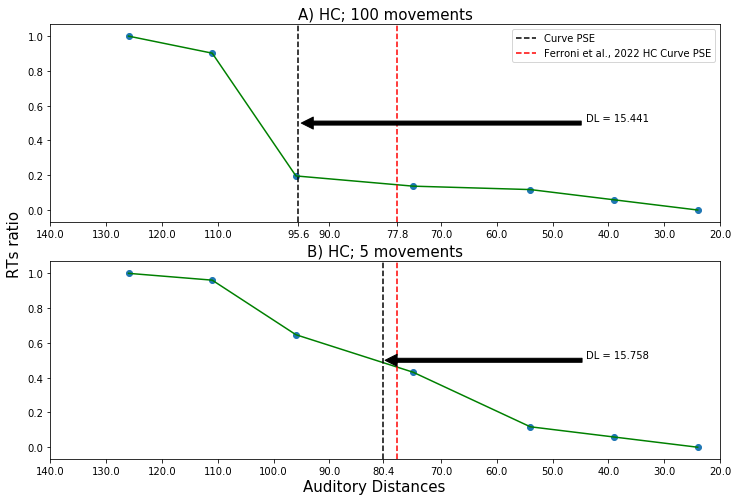

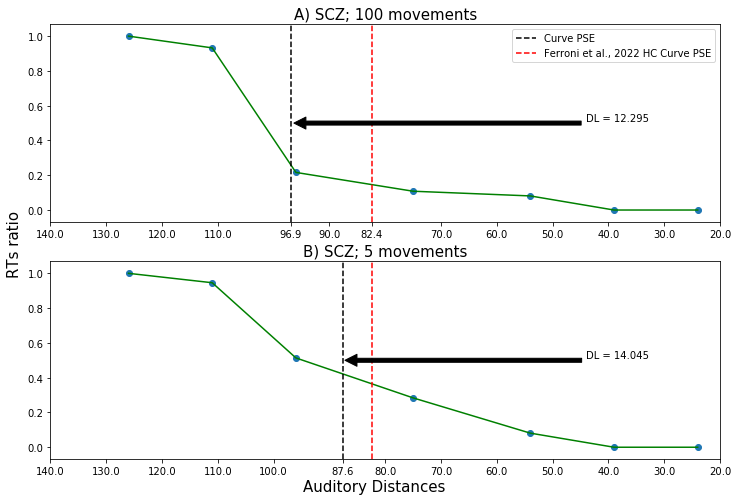

In [111]:
a_distances2 = [19, 24, 39, 54, 75, 96, 111, 126, 135] #add external limits
SCZpostPSE, M, SIG, SCZpostDL, S, fimono, fis = SK(SCZrtpost, a_distances2, [1,1,1,1,1, 1, 1])

fig, ax = plt.subplots(2, 1, figsize =(12, 8))

ax[0].plot(a_distances, fimono, color = "green")
ax[0].scatter(a_distances, fis)
ax[0].axvline(x = SCZpostPSE, color = 'black', label = 'Curve PSE', linestyle = "dashed")
ax[0].axvline(x = fpostSCZPSE, color = 'red', label = 'Ferroni et al., 2022 HC Curve PSE', linestyle = "dashed")
ax[0].set_xlim(np.max(a_distances), np.min(a_distances))
ax[0].set_xticks([20,30,40,50,60,70,fpostSCZPSE,90, SCZpostPSE ,110,120,130,140])
ax[0].set_title("A) HC; 100 movements", fontsize = 15)
ax[0].legend(loc='best')
ax[0].annotate('DL = {}'.format(round(SCZpostDL, 3)),
            xy=(SCZpostPSE, (np.max(fimono) + np.min(fimono))/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

SCZpostPSE, M, SIG, SCZpostDL, S, fimono, fis = SK(SCZrtpost5, a_distances2, [1,1,1,1,1, 1, 1])

ax[1].plot(a_distances, fimono, color = "green")
ax[1].scatter(a_distances, fis)
ax[1].axvline(x = SCZpostPSE, color = 'black', label = 'Curve PSE', linestyle = "dashed")
ax[1].axvline(x = fpostSCZPSE, color = 'red', label = 'Ferroni et al., 2022 HC Curve PSE', linestyle = "dashed")
ax[1].set_xlim(np.max(a_distances), np.min(a_distances))
ax[1].set_xticks([20,30,40,50,60,70,90, 100, SCZpostPSE ,110,120,130,140])
ax[1].set_title("B) HC; 5 movements", fontsize = 15)
ax[1].annotate('DL = {}'.format(round(SCZpostDL, 3)),
            xy=(SCZpostPSE, (np.max(fimono) + np.min(fimono))/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

fig.text(0.075, 0.5, 'RTs ratio', va='center', rotation='vertical', fontsize = 15)
fig.text(0.5, 0.07, 'Auditory Distances', ha='center', fontsize = 15)

fig, ax = plt.subplots(2, 1, figsize =(12, 8))

PSE, M, SIG, DL, S, fimono, fis = SK(HCrtpost, a_distances2, [1,1,1,1,1, 1, 1])

ax[0].plot(a_distances, fimono, color = "green")
ax[0].scatter(a_distances, fis)
ax[0].axvline(x = PSE, color = 'black', label = 'Curve PSE', linestyle = "dashed")
ax[0].axvline(x = fpostHCPSE, color = 'red', label = 'Ferroni et al., 2022 HC Curve PSE', linestyle = "dashed")
ax[0].set_xlim(np.max(a_distances), np.min(a_distances))
ax[0].set_xticks([20,30,40,50,60,70,fpostHCPSE,90, PSE ,110,120,130,140])
ax[0].set_title("A) SCZ; 100 movements", fontsize = 15)
ax[0].annotate('DL = {}'.format(round(DL, 3)),
            xy=(PSE, (np.max(fimono) + np.min(fimono))/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')
ax[0].legend(loc='best')

PSE, M, SIG, DL, S, fimono, fis = SK(HCrtpost5, a_distances2, [1,1,1,1,1, 1, 1])

ax[1].plot(a_distances, fimono, color = "green")
ax[1].scatter(a_distances, fis)
ax[1].axvline(x = PSE, color = 'black', label = 'Curve PSE', linestyle = "dashed")
ax[1].axvline(x = fpostHCPSE, color = 'red', label = 'Ferroni et al., 2022 HC Curve PSE', linestyle = "dashed")
ax[1].set_xlim(np.max(a_distances), np.min(a_distances))
ax[1].set_xticks([20,30,40,50,60,70,80, PSE ,100, 110,120,130,140])
ax[1].set_title("B) SCZ; 5 movements", fontsize = 15)
ax[1].annotate('DL = {}'.format(round(DL, 3)),
            xy=(PSE, (np.max(fimono) + np.min(fimono))/2), xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='bottom')

fig.text(0.075, 0.5, 'RTs ratio', va='center', rotation='vertical', fontsize = 15)
fig.text(0.5, 0.07, 'Auditory Distances', ha='center', fontsize = 15)
plt.show()